<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

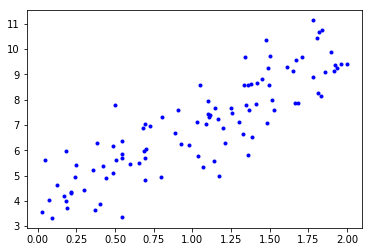

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 


X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

plt.plot(X,y,"b.")
plt.show()


In [0]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [37]:
theta_best

array([[3.92836605],
       [2.94704746]])

In [38]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.92836605],
       [9.82246096]])

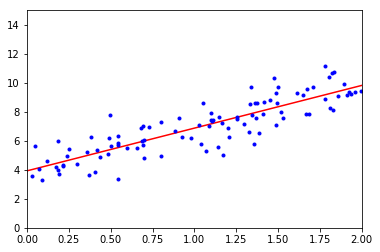

In [39]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()


In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_







(array([3.92836605]), array([[2.94704746]]))

In [41]:
lin_reg.predict(X_new)

array([[3.92836605],
       [9.82246096]])

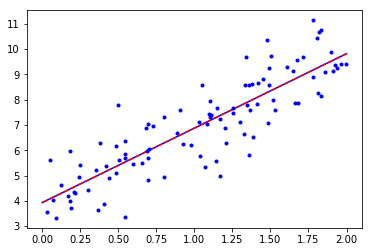

In [42]:

y_lin_reg = lin_reg.predict(X_new)

plt.plot(X_new,y_lin_reg,"b-")
plt.plot(X_new,y_predict,"r--")
plt.plot(X,y,"b.")
plt.show()


In [43]:
eta = 0.1
n_iterations = 1000
m = 100 

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients 
  
  
theta 





array([[3.92836605],
       [2.94704746]])

In [44]:
n_epochs = 50 
t0, t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)


for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    #eta = learning_schedule(epoch*m+i)
    theta = theta-eta*gradients
  
  
theta
  
 

array([[3.85536725],
       [2.90341558]])

In [45]:
y

array([[ 8.24888532],
       [ 4.95455485],
       [ 5.84430768],
       [10.34917897],
       [ 9.68947938],
       [ 9.74332433],
       [ 7.80220016],
       [ 5.4151683 ],
       [ 6.29814951],
       [ 6.23386709],
       [ 6.1738921 ],
       [ 8.91497499],
       [ 9.36264114],
       [ 5.47490491],
       [ 7.40304316],
       [ 4.99211539],
       [ 9.08812063],
       [ 6.53864355],
       [ 7.06854547],
       [ 9.30477461],
       [ 7.87325978],
       [ 7.47368164],
       [ 3.86512422],
       [ 8.59236991],
       [ 9.68686522],
       [ 6.8844665 ],
       [ 9.15543066],
       [ 5.38889621],
       [ 6.27998894],
       [ 4.43345385],
       [ 6.20204949],
       [ 3.64845377],
       [ 7.11084129],
       [ 4.36274667],
       [ 7.67467391],
       [ 4.82876798],
       [ 8.63976357],
       [ 9.41757623],
       [10.66468606],
       [ 9.27099707],
       [ 7.79615244],
       [ 3.70823995],
       [ 8.58664888],
       [ 8.6510078 ],
       [ 5.56314871],
       [ 4

In [46]:
y.ravel()

array([ 8.24888532,  4.95455485,  5.84430768, 10.34917897,  9.68947938,
        9.74332433,  7.80220016,  5.4151683 ,  6.29814951,  6.23386709,
        6.1738921 ,  8.91497499,  9.36264114,  5.47490491,  7.40304316,
        4.99211539,  9.08812063,  6.53864355,  7.06854547,  9.30477461,
        7.87325978,  7.47368164,  3.86512422,  8.59236991,  9.68686522,
        6.8844665 ,  9.15543066,  5.38889621,  6.27998894,  4.43345385,
        6.20204949,  3.64845377,  7.11084129,  4.36274667,  7.67467391,
        4.82876798,  8.63976357,  9.41757623, 10.66468606,  9.27099707,
        7.79615244,  3.70823995,  8.58664888,  8.6510078 ,  5.56314871,
        4.28925219,  5.09217853,  8.57670775,  6.35104757,  8.56740422,
        3.98166204,  4.18611546,  3.32311024,  6.88537498,  7.33472233,
        7.02954087,  4.88974389,  9.57249507,  8.12714385,  7.66025232,
        3.54234305,  7.25635839,  3.34400994,  6.6417109 ,  5.6953159 ,
        9.26206502,  8.80578243, 11.14395249,  5.3298285 ,  5.68

In [47]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [48]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.93723673]), array([2.95746042]))